In [1]:
# 필요한 모듈 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# 데이터 준비 --------------------------
# 파일 불러오기
apart = pd.read_csv(r"C:\bbalgayo\플젝02_0822\3.공공데이터\아파트매매가격.csv", encoding="EUC-KR", index_col=0)
print(apart.head())

        2012-01   2012-02   2012-03   2012-04   2012-05   2012-06   2012-07  \
지 역                                                                           
전국     264474.0  264035.0  263470.0  262630.0  261823.0  260425.0  258959.0   
수도권    365249.0  364275.0  362790.0  360918.0  359253.0  356737.0  354214.0   
지방권    163394.0  163491.0  163849.0  164044.0  164096.0  163820.0  163416.0   
6대광역시  195186.0  194989.0  195093.0  195037.0  194851.0  194273.0  193523.0   
5대광역시  190421.0  190312.0  190555.0  190603.0  190631.0  190183.0  189587.0   

        2012-08   2012-09   2012-10  ...   2022-08   2022-09   2022-10  \
지 역                                  ...                                 
전국     257163.0  255680.0  254426.0  ...  506802.0  502163.0  495107.0   
수도권    350990.0  348174.0  345665.0  ...  746956.0  739933.0  728974.0   
지방권    163052.0  162905.0  162910.0  ...  289743.0  287259.0  283731.0   
6대광역시  192675.0  192214.0  191889.0  ...  390168.0  385705.0  379537.0   
5대

In [7]:
# 지역 인덱스 공백 제거
apart.index = apart.index.str.replace(' ', '')
print(apart.columns)

Index(['2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
       '2012-07', '2012-08', '2012-09', '2012-10',
       ...
       '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01',
       '2023-02', '2023-03', '2023-04', '2023-05'],
      dtype='object', length=137)


In [8]:
# 필요한 데이터만 추출
df = apart[apart.index.str.contains('수원')]    # 수원이 포함된 인덱스만 추출
apart = df.loc[:, '2013-05':]
print(apart)
print(apart.shape)

           2013-05   2013-06   2013-07   2013-08   2013-09   2013-10  \
지 역                                                                    
경기수원시     241104.0  241129.0  240860.0  239782.0  239616.0  239943.0   
경기수원시장안구  230163.0  229628.0  229337.0  228570.0  228244.0  228640.0   
경기수원시권선구  212274.0  212857.0  213131.0  212333.0  212667.0  213131.0   
경기수원시팔달구  248891.0  249594.0  248578.0  248250.0  247750.0  248109.0   
경기수원시영통구  268140.0  267860.0  267480.0  265670.0  265360.0  265520.0   

           2013-11   2013-12   2014-01   2014-02  ...   2022-08   2022-09  \
지 역                                               ...                       
경기수원시     240682.0  241313.0  251371.0  251881.0  ...  617977.0  610366.0   
경기수원시장안구  228988.0  229209.0  229163.0  229302.0  ...  544000.0  540821.0   
경기수원시권선구  214048.0  214786.0  225989.0  226333.0  ...  498153.0  494956.0   
경기수원시팔달구  247750.0  248906.0  250094.0  251484.0  ...  555878.0  551497.0   
경기수원시영통구  266830.0  267460.0  287

In [9]:
# 날짜 -, - 뒤에 월 제거
apart.columns = apart.columns.str.replace(r'-\d\d', '', regex=True)
print(apart)

              2013      2013      2013      2013      2013      2013  \
지 역                                                                    
경기수원시     241104.0  241129.0  240860.0  239782.0  239616.0  239943.0   
경기수원시장안구  230163.0  229628.0  229337.0  228570.0  228244.0  228640.0   
경기수원시권선구  212274.0  212857.0  213131.0  212333.0  212667.0  213131.0   
경기수원시팔달구  248891.0  249594.0  248578.0  248250.0  247750.0  248109.0   
경기수원시영통구  268140.0  267860.0  267480.0  265670.0  265360.0  265520.0   

              2013      2013      2014      2014  ...      2022      2022  \
지 역                                               ...                       
경기수원시     240682.0  241313.0  251371.0  251881.0  ...  617977.0  610366.0   
경기수원시장안구  228988.0  229209.0  229163.0  229302.0  ...  544000.0  540821.0   
경기수원시권선구  214048.0  214786.0  225989.0  226333.0  ...  498153.0  494956.0   
경기수원시팔달구  247750.0  248906.0  250094.0  251484.0  ...  555878.0  551497.0   
경기수원시영통구  266830.0  267460.0  287

In [10]:
# transpose()로 열과 행 바꾸기
apart = apart.transpose()
print(apart)

지 역      경기수원시  경기수원시장안구  경기수원시권선구  경기수원시팔달구  경기수원시영통구
2013  241104.0  230163.0  212274.0  248891.0  268140.0
2013  241129.0  229628.0  212857.0  249594.0  267860.0
2013  240860.0  229337.0  213131.0  248578.0  267480.0
2013  239782.0  228570.0  212333.0  248250.0  265670.0
2013  239616.0  228244.0  212667.0  247750.0  265360.0
...        ...       ...       ...       ...       ...
2023  544030.0  493700.0  449161.0  490453.0  681205.0
2023  527192.0  480009.0  438028.0  481127.0  654065.0
2023  519976.0  470686.0  430422.0  469311.0  650776.0
2023  516498.0  463409.0  426482.0  465031.0  650753.0
2023  517896.0  464195.0  425566.0  464323.0  655422.0

[121 rows x 5 columns]


In [11]:
# 정보 및 결측치 확인
apart.info()
apartnan = apart.isna().sum()   
print(apartnan)

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 2013 to 2023
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   경기수원시     121 non-null    float64
 1   경기수원시장안구  121 non-null    float64
 2   경기수원시권선구  121 non-null    float64
 3   경기수원시팔달구  121 non-null    float64
 4   경기수원시영통구  121 non-null    float64
dtypes: float64(5)
memory usage: 9.7+ KB
지 역
경기수원시       0
경기수원시장안구    0
경기수원시권선구    0
경기수원시팔달구    0
경기수원시영통구    0
dtype: int64


In [12]:
# 아파트 매매 가격 통계 확인
print(apart.describe())

지 역            경기수원시       경기수원시장안구       경기수원시권선구       경기수원시팔달구  \
count     121.000000     121.000000     121.000000     121.000000   
mean   376036.752066  330764.421488  314893.834711  351615.793388   
std    126792.809350  106276.588442   96733.389484  106494.537852   
min    239616.000000  228244.000000  212274.000000  247750.000000   
25%    294338.000000  261988.000000  250789.000000  273850.000000   
50%    321637.000000  296137.000000  269582.000000  300803.000000   
75%    459897.000000  374337.000000  379712.000000  429351.000000   
max    635597.000000  554222.000000  512791.000000  565506.000000   

지 역         경기수원시영통구  
count     121.000000  
mean   464550.140496  
std    177210.907521  
min    265360.000000  
25%    354042.000000  
50%    386357.000000  
75%    588099.000000  
max    827507.000000  


In [13]:
# 아파트 연도별로 그룹화하기(연도 합쳐짐 + 평균값)
apartgroup = round(apart.groupby(apart.index).mean(), 3)
print(apartgroup)

지 역        경기수원시    경기수원시장안구    경기수원시권선구    경기수원시팔달구    경기수원시영통구
2013  240553.625  229097.375  213153.375  248478.500  266790.000
2014  254713.667  230689.917  227957.417  255336.083  292214.500
2015  279956.833  250247.167  242636.000  270518.000  329760.000
2016  295224.500  262528.083  252849.583  274479.500  355356.667
2017  299888.417  267549.833  258770.417  279387.667  359505.750
2018  323258.500  296720.667  270195.583  303712.750  388715.500
2019  347507.250  307741.250  283927.500  330911.000  430093.500
2020  441832.750  362474.500  366465.500  412427.833  561892.000
2021  554228.250  463493.000  451073.000  502312.000  720652.500
2022  615925.333  543365.333  498397.333  553201.667  793811.750
2023  525118.400  474399.800  433931.800  474049.000  658444.200


In [15]:
# min, max, mean 값을 파악하기 위한 새로운 데이터프레임 생성
column = ['경기수원시', '경기수원시장안구', '경기수원시권선구', '경기수원시팔달구', '경기수원시영통구']
min_list = []
max_list = []
mean_list= []
for col in column:
    min_list.append(min(apart[col]))
    max_list.append(max(apart[col]))
    mean_list.append(round(np.mean(apart[col]), 3))
print("각 지역 최소값:", min_list)
print("각 지역 최대값:", max_list)
print("각 지역 평균값:", mean_list)
min_series = pd.Series(min_list, index = column)
max_series = pd.Series(max_list, index = column)
mean_series = pd.Series(mean_list, index = column)
newdf = pd.DataFrame([min_series, max_series, mean_series], index = ['최솟값', '최댓값', '평균값'])
print(newdf)

각 지역 최소값: [239616.0, 228244.0, 212274.0, 247750.0, 265360.0]
각 지역 최대값: [635597.0, 554222.0, 512791.0, 565506.0, 827507.0]
각 지역 평균값: [376036.752, 330764.421, 314893.835, 351615.793, 464550.14]
          경기수원시    경기수원시장안구    경기수원시권선구    경기수원시팔달구   경기수원시영통구
최솟값  239616.000  228244.000  212274.000  247750.000  265360.00
최댓값  635597.000  554222.000  512791.000  565506.000  827507.00
평균값  376036.752  330764.421  314893.835  351615.793  464550.14


In [20]:
# 시각화 --------------------------
plt.rcParams['font.family'] = 'NanumBarunGothic' # 폰트 나눔바른고딕으로 설정하기

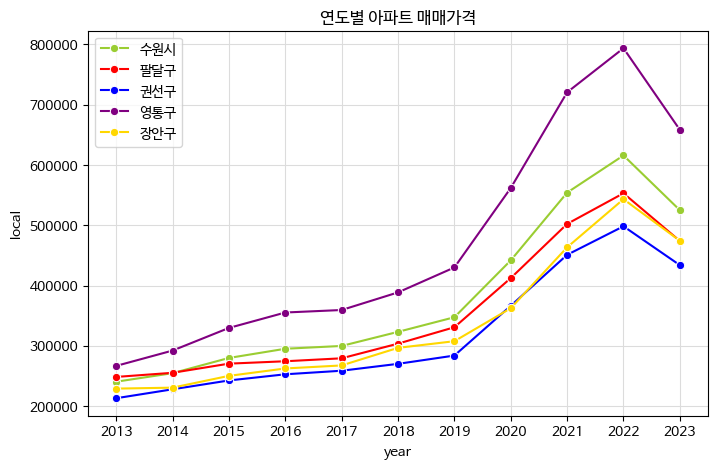

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
ax1 = sns.lineplot(x=apartgroup.index, y=apartgroup['경기수원시'], marker='o', color='yellowgreen', label='수원시')
ax2 = sns.lineplot(x=apartgroup.index, y=apartgroup['경기수원시팔달구'], marker='o', color='red', label='팔달구')
ax3 = sns.lineplot(x=apartgroup.index, y=apartgroup['경기수원시권선구'], marker='o', color='blue', label='권선구')
ax4 = sns.lineplot(x=apartgroup.index, y=apartgroup['경기수원시영통구'], marker='o', color='purple', label='영통구')
ax5 = sns.lineplot(x=apartgroup.index, y=apartgroup['경기수원시장안구'], marker='o', color='gold', label='장안구')

plt.xlabel('year')
plt.ylabel('local')
plt.title('연도별 아파트 매매가격')
plt.legend(loc='best')
plt.grid(True, color='gainsboro')
plt.show()

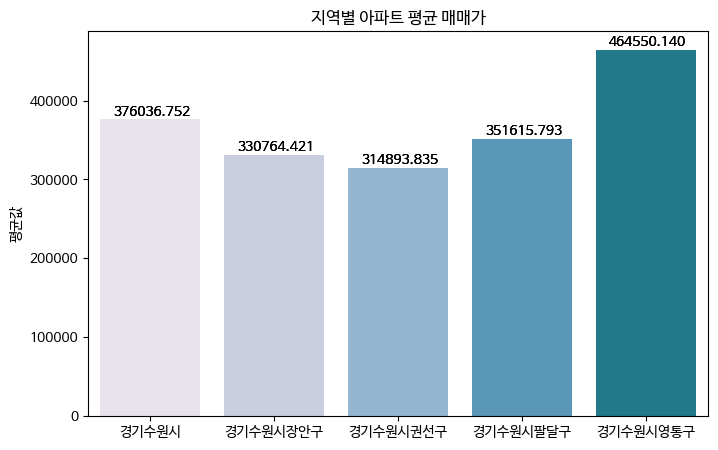

In [26]:
fig, ax1 = plt.subplots()
fig.set_size_inches(8, 5)
sns.color_palette('PuBuGn')
sns.set_palette('PuBuGn')
ax1 = sns.barplot(x=newdf.columns, y=newdf.iloc[2])
plt.title('지역별 아파트 평균 매매가')
for i in range(len(apartgroup.columns)):    # 그래프 위에 수치 적기
    for j in range(3):
        t = ax1.patches[i]
        ax1.text(x=t.get_x() + t.get_width()-0.7, y=t.get_height()+5000, s='{:.3f}'.format(newdf.iloc[2, i]))
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


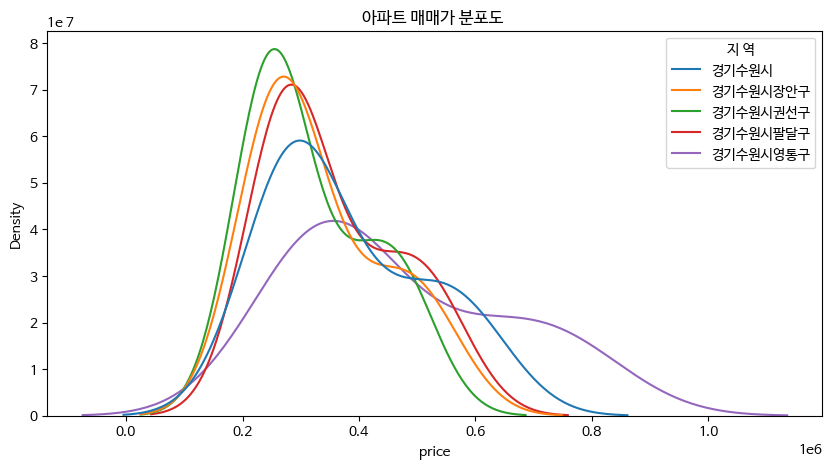

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax = sns.kdeplot(apartgroup)
plt.xlabel('price')
plt.title('아파트 매매가 분포도 ')
plt.show()